In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import pickle

In [21]:
import seaborn as sns

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the dataset
df = pd.read_csv('kaggle_diabetes.csv')

In [3]:
# Renaming DiabetesPedigreeFunction as DPF
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})

In [4]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [5]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [6]:
df_copy.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138.0,62.0,35.0,NaN,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,NaN,NaN,NaN,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0
5,0,173.0,78.0,32.0,265.0,46.5,1.159,58,0
6,4,99.0,72.0,17.0,NaN,25.6,0.294,28,0
7,8,194.0,80.0,NaN,NaN,26.1,0.551,67,0
8,2,83.0,65.0,28.0,66.0,36.8,0.629,24,0
9,2,89.0,90.0,30.0,NaN,33.5,0.292,42,0


In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    2000 non-null   int64  
 1   Glucose        1987 non-null   float64
 2   BloodPressure  1910 non-null   float64
 3   SkinThickness  1427 non-null   float64
 4   Insulin        1044 non-null   float64
 5   BMI            1972 non-null   float64
 6   DPF            2000 non-null   float64
 7   Age            2000 non-null   int64  
 8   Outcome        2000 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 140.8 KB


In [80]:
st=df['Outcome'].value_counts()
print('\nThe target variable is divided into: \n',st) #how many belong to each class of target variable


The target variable is divided into: 
 0    1316
1     684
Name: Outcome, dtype: int64


In [8]:
df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,2000.000000,1987.000000,1910.000000,1427.000000,1044.000000,1972.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.975340,72.403665,29.341275,153.743295,32.650101,0.470930,33.090500,0.342000
std,3.306063,30.632883,12.227968,10.802278,111.273639,7.241027,0.323553,11.786423,0.474498
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.750000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,126.000000,32.400000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [11]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df_copy.columns if df_copy[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df_copy[feature].isnull().mean(), 4),  ' % missing values')

Glucose 0.0065  % missing values
BloodPressure 0.045  % missing values
SkinThickness 0.2865  % missing values
Insulin 0.478  % missing values
BMI 0.014  % missing values


In [12]:
# list of numerical variables
numerical_features = [feature for feature in df_copy.columns if df_copy[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_copy[numerical_features].head()

Number of numerical variables:  9


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138.0,62.0,35.0,NaN,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,NaN,NaN,NaN,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0


In [13]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df_copy[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [14]:
discrete_feature

['Pregnancies', 'Outcome']

In [15]:
df_copy[discrete_feature].head()

,Pregnancies,Outcome
0,2,1
1,0,0
2,0,1
3,0,1
4,1,0


In [16]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 7


In [18]:
df_copy[continuous_feature].head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,138.0,62.0,35.0,NaN,33.6,0.127,47
1,84.0,82.0,31.0,125.0,38.2,0.233,23
2,145.0,NaN,NaN,NaN,44.2,0.630,31
3,135.0,68.0,42.0,250.0,42.3,0.365,24
4,139.0,62.0,41.0,480.0,40.7,0.536,21


In [19]:
df_copy['Outcome']

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

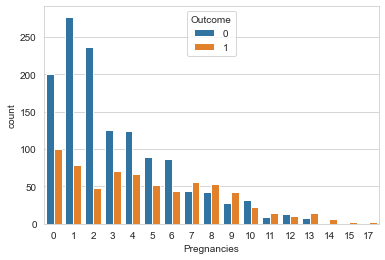

In [50]:
sns.countplot(x='Pregnancies',hue='Outcome',data=df_copy)

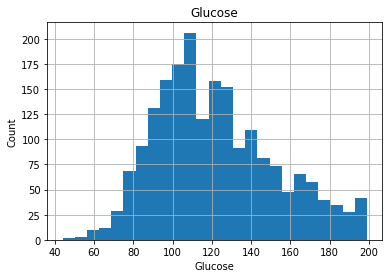

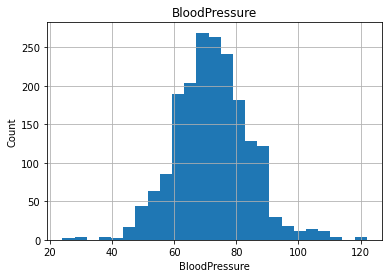

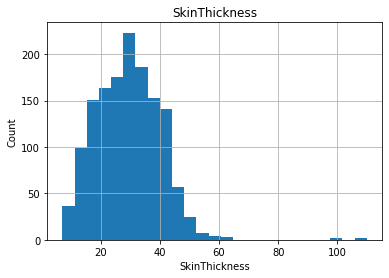

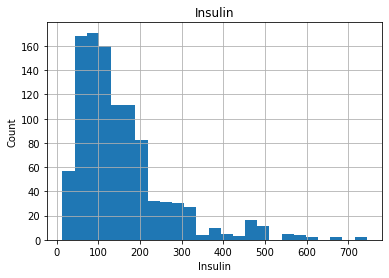

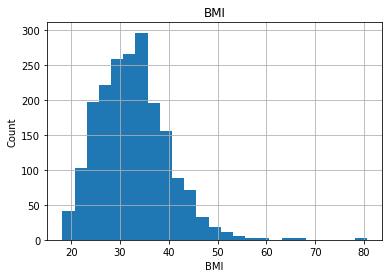

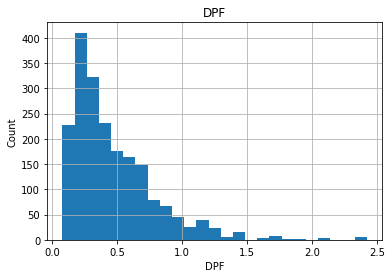

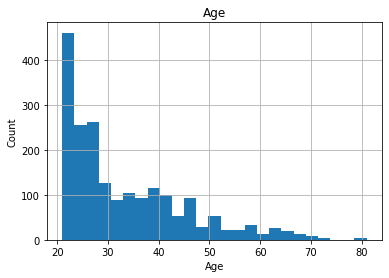

In [33]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    #data=dataset.copy()
    df_copy[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` paramet

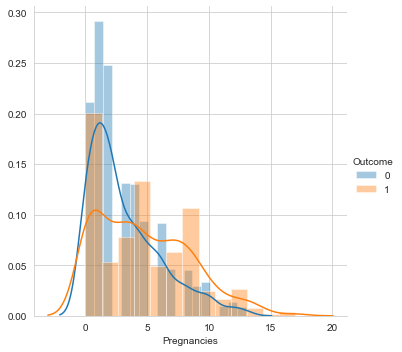

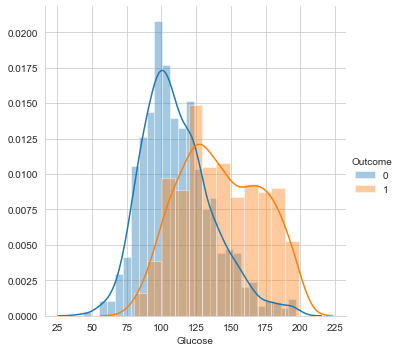

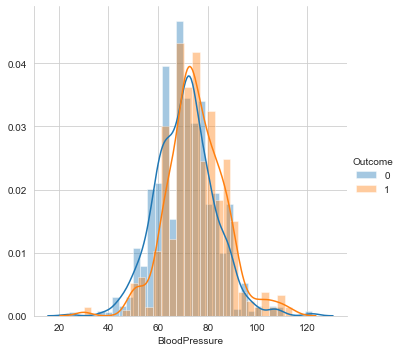

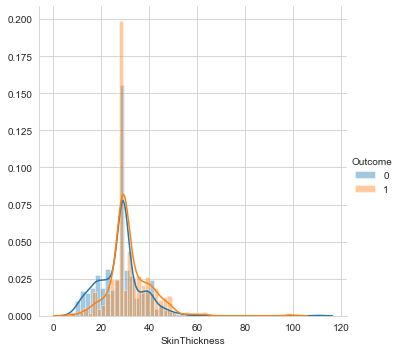

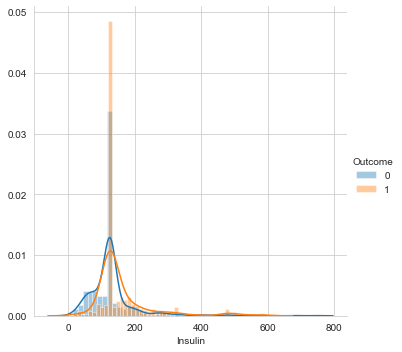

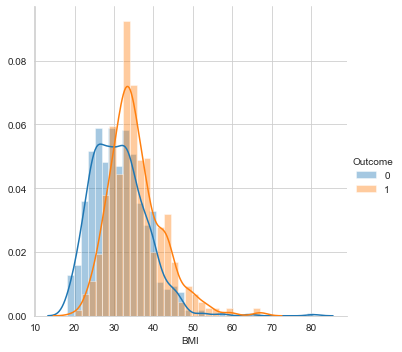

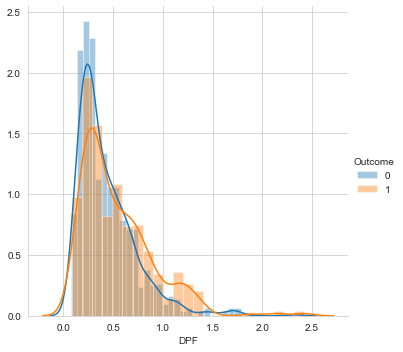

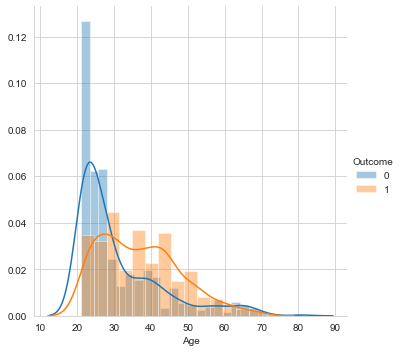

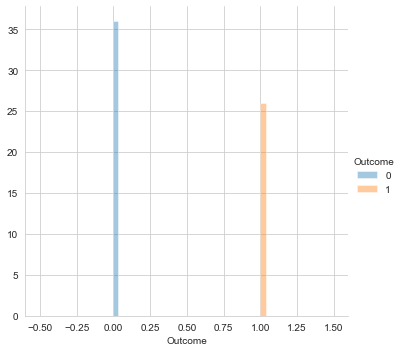

In [78]:
for feature in df_copy.columns.values:
    
    sns.FacetGrid(df_copy,hue='Outcome',size=5).map(sns.distplot,feature).add_legend()
    

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


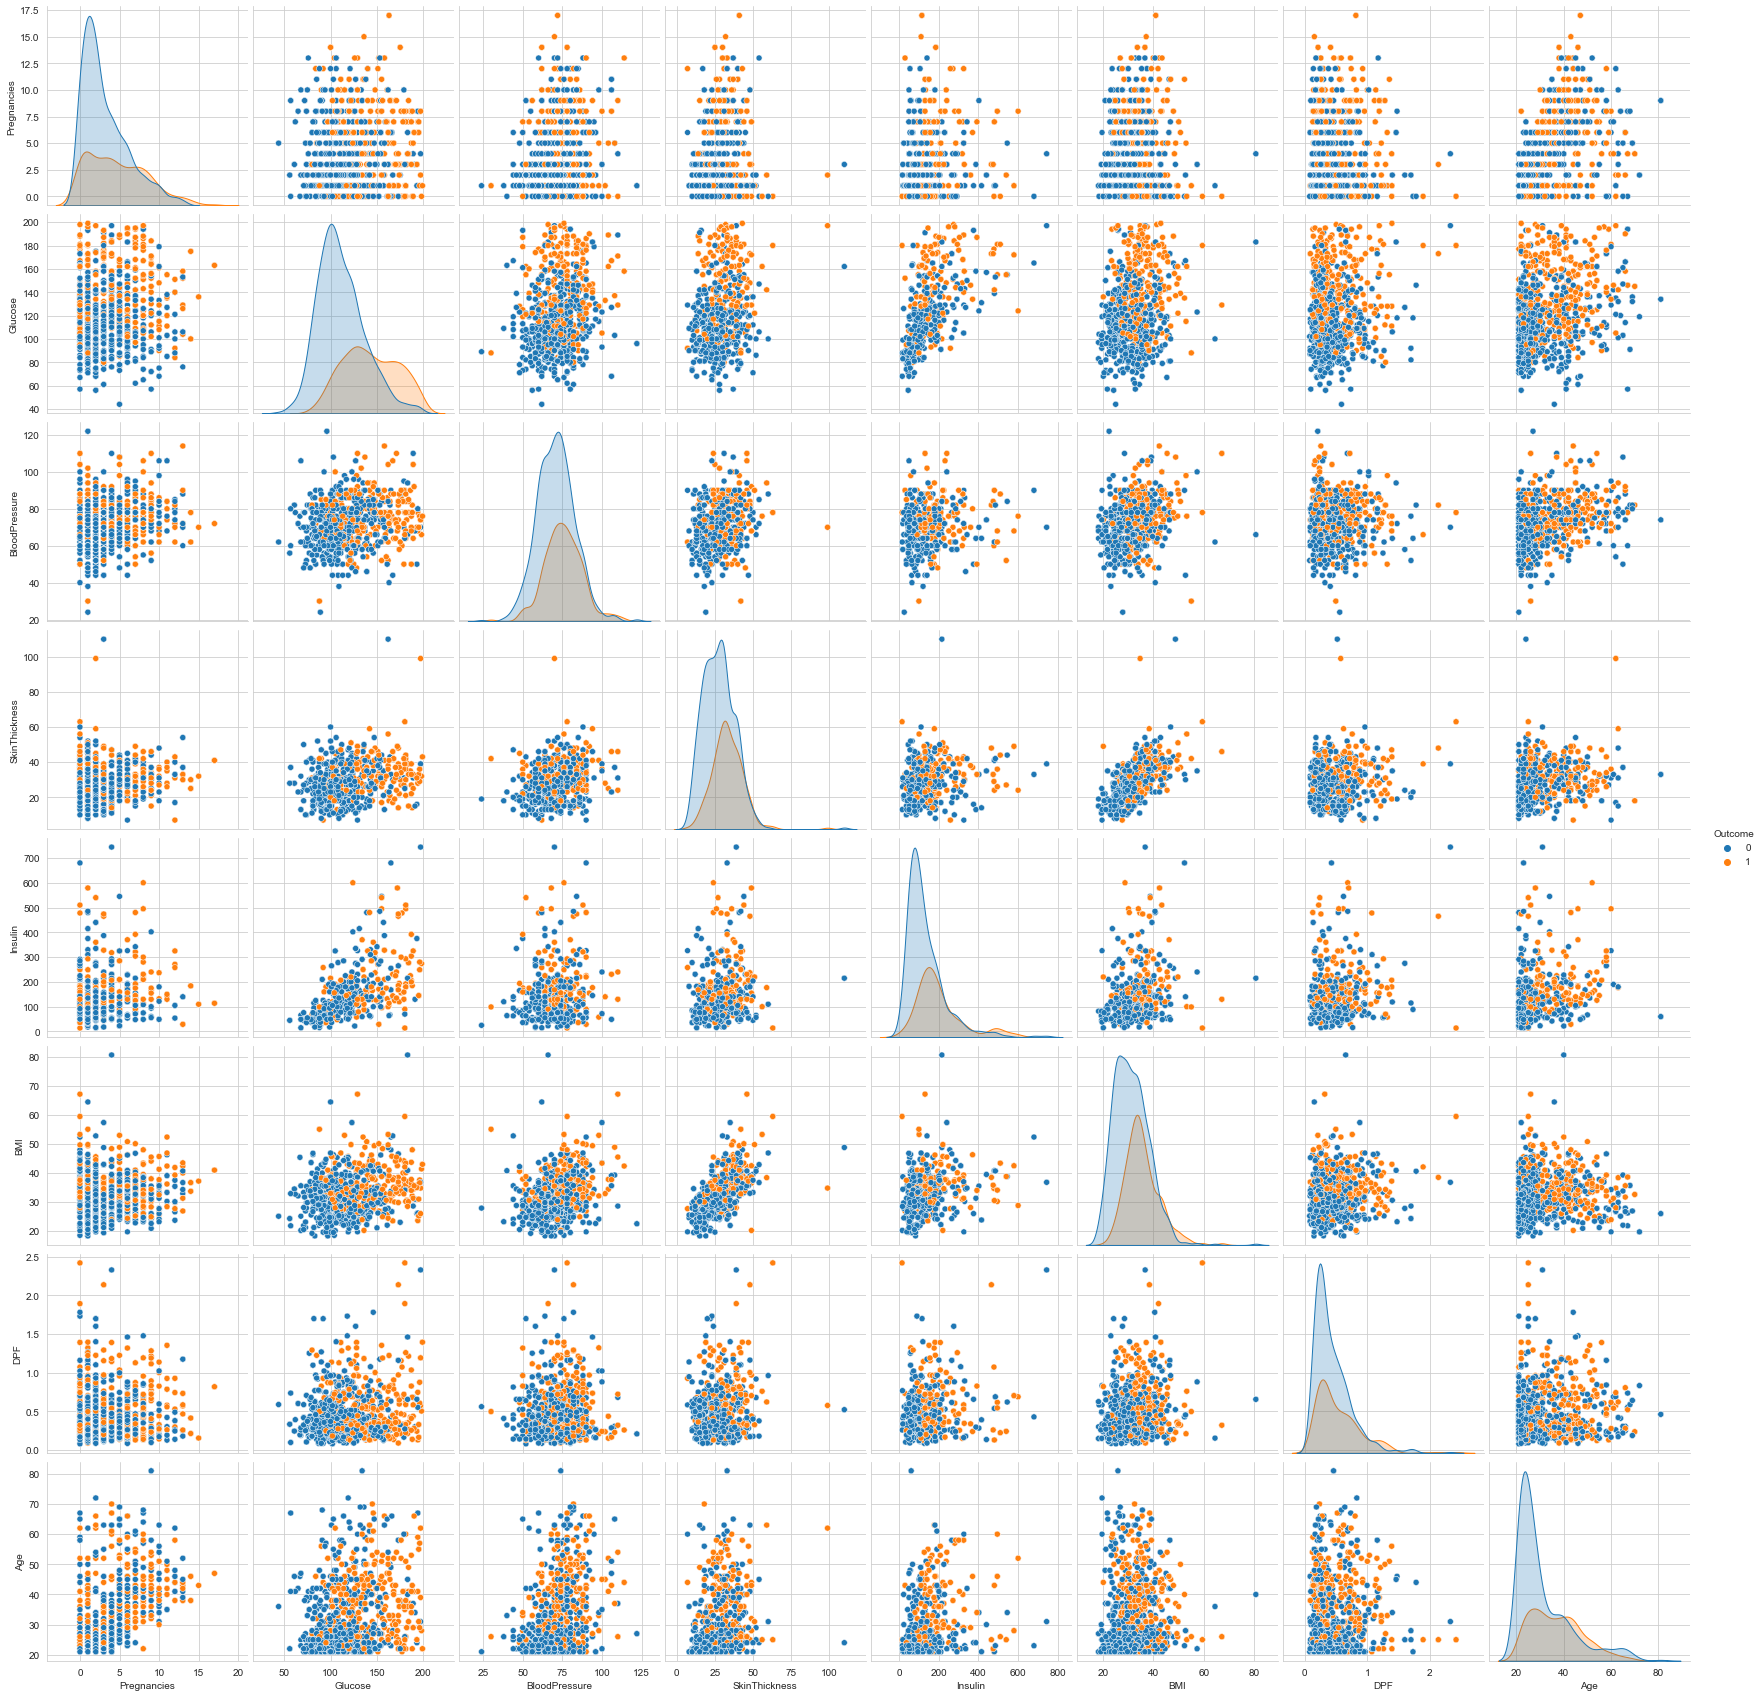

In [40]:
sns.set_style("whitegrid");
sns.pairplot(df_copy, hue="Outcome", size=3);
plt.show()
    
    


In [41]:
df.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DPF', 'Age', 'Outcome'], dtype=object)

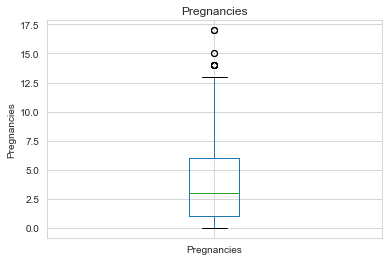

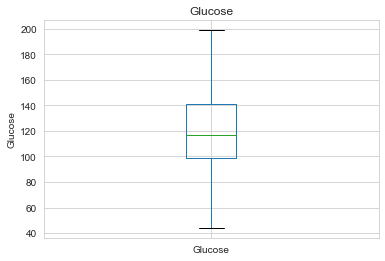

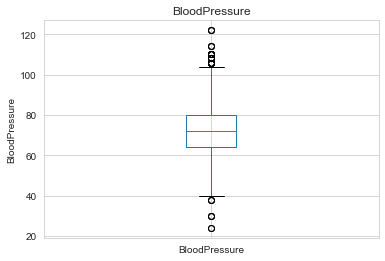

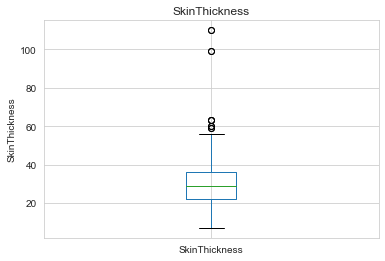

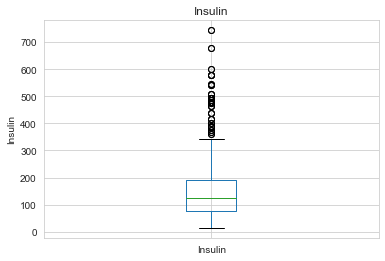

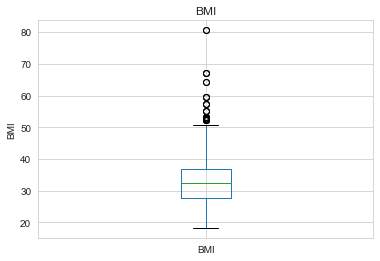

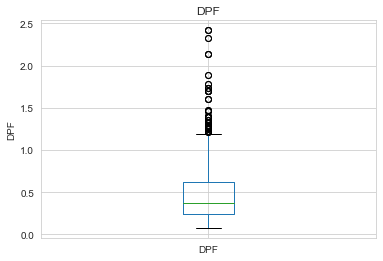

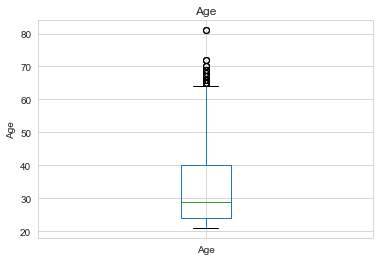

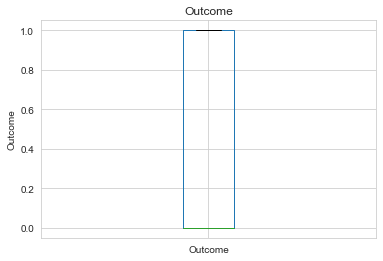

In [45]:
for feature in df.columns.values:
    df_copy.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()
    
        

In [51]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

In [52]:
df_copy.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47,1
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23,0
2,0,145.0,72.403665,29.0,126.0,44.2,0.630,31,1
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21,0
5,0,173.0,78.000000,32.0,265.0,46.5,1.159,58,0
6,4,99.0,72.000000,17.0,126.0,25.6,0.294,28,0
7,8,194.0,80.000000,29.0,126.0,26.1,0.551,67,0
8,2,83.0,65.000000,28.0,66.0,36.8,0.629,24,0
9,2,89.0,90.000000,30.0,126.0,33.5,0.292,42,0


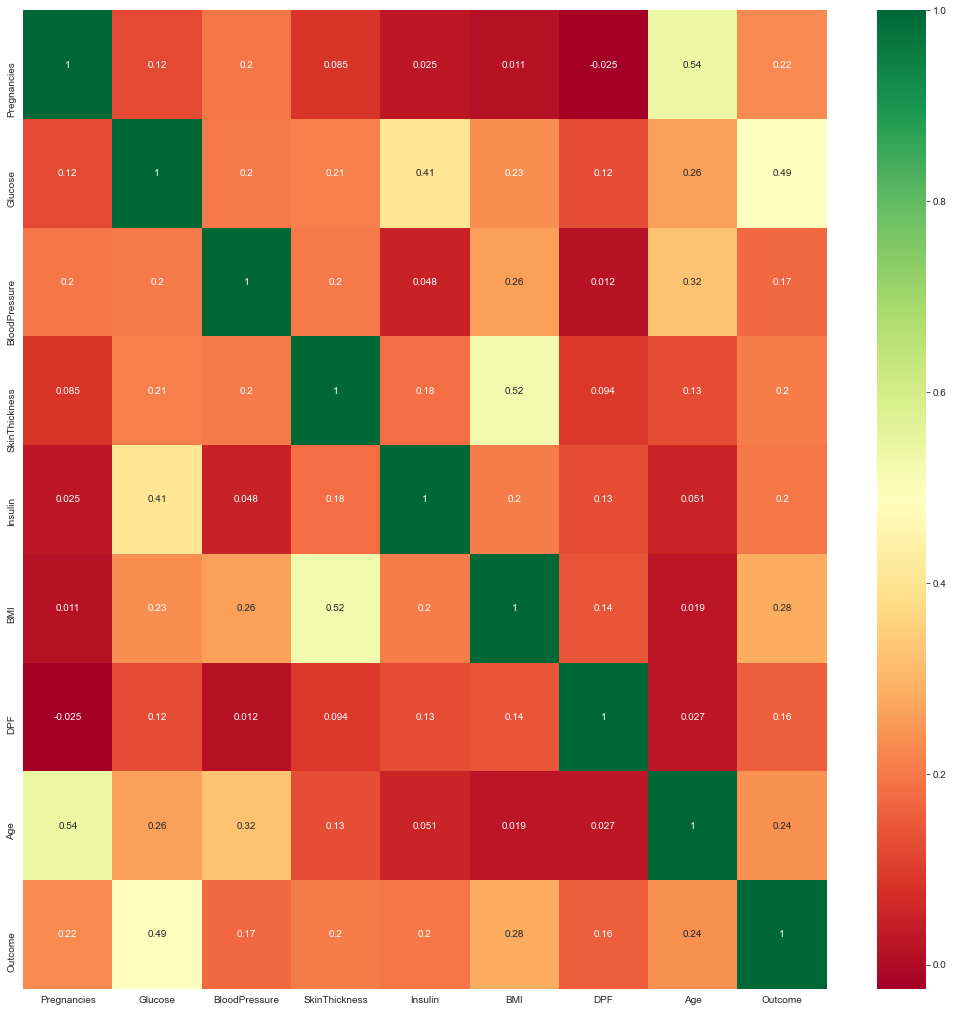

In [53]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df_copy.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [54]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [55]:
# Model Building
from sklearn.model_selection import train_test_split
X = df_copy.drop(columns='Outcome')
y = df_copy['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
Log_pred=log_classifier.predict(X_test)

In [58]:
# Accuracy Score
import sklearn.metrics as metrics
metrics.accuracy_score(y_test,Log_pred)

0.7875

In [59]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, Log_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       272
           1       0.71      0.57      0.63       128

    accuracy                           0.79       400
   macro avg       0.76      0.73      0.74       400
weighted avg       0.78      0.79      0.78       400



In [60]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = log_classifier, X = X_test, y = y_test, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Accuracy: 77.50 %
Standard Deviation: 5.48 %


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Adaboost Classifier

In [61]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [62]:
ada_pred=ada_classifier.predict(X_test)

In [63]:
# Accuracy Score
import sklearn.metrics as metrics
metrics.accuracy_score(y_test,ada_pred)

0.8075

In [64]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       272
           1       0.71      0.67      0.69       128

    accuracy                           0.81       400
   macro avg       0.78      0.77      0.78       400
weighted avg       0.81      0.81      0.81       400



In [ ]:
KNN Classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [66]:
knn_pred=knn_classifier.predict(X_test)

In [67]:
# Accuracy Score
import sklearn.metrics as metrics
metrics.accuracy_score(y_test,knn_pred)

0.8025

In [68]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       272
           1       0.71      0.65      0.68       128

    accuracy                           0.80       400
   macro avg       0.78      0.76      0.77       400
weighted avg       0.80      0.80      0.80       400



Random Forest Classifier

In [69]:
# Creating Random Forest Model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
RF_pred=classifier.predict(X_test)

In [71]:
# Accuracy Score
import sklearn.metrics as metrics
metrics.accuracy_score(y_test,RF_pred)

0.9875

In [72]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, RF_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       272
           1       1.00      0.96      0.98       128

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.99       400
weighted avg       0.99      0.99      0.99       400



In [73]:
data = np.array([[2, 122, 122, 35, 125, 33.6, 0.126, 47]])
        

In [74]:
my_prediction = classifier.predict(data)

In [75]:
print(my_prediction)

[0]


In [30]:
# Creating a pickle file for the classifier
filename = 'diabetes-prediction-rfc-model.pkl'
pickle.dump(classifier, open(filename, 'wb'))